# Apply the Random forest model on Glass dataset

In [1]:
#Importing Libraries & Data
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets



In [2]:
# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC

In [4]:
!pip install xgboost

In [5]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Import dataset

glass_df = pd.read_excel("glass.xlsx", sheet_name='glass',header=0)
print(glass_df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [9]:
glass_df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
glass_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
glass_df.describe() 


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Exploratory Data Analyses

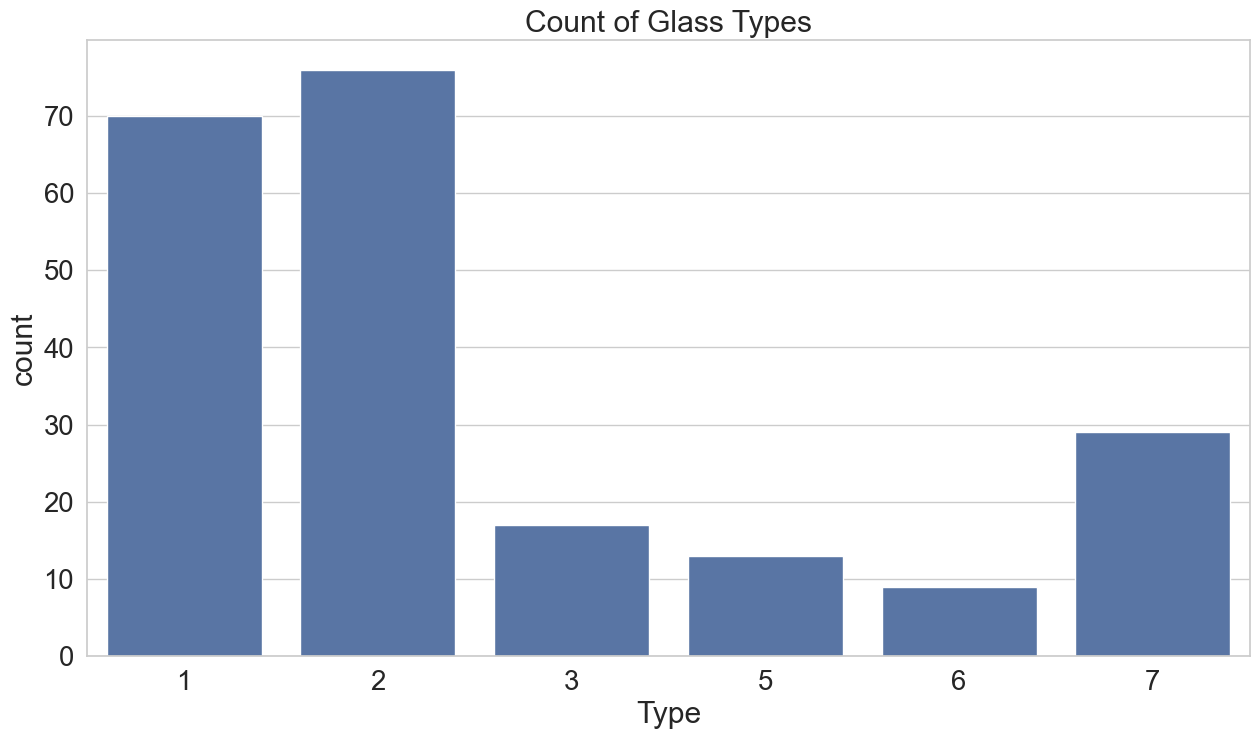

In [27]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x='Type', data=glass_df).set_title('Count of Glass Types')
plt.show() # Add plt.show() to ensure the plot displays

In [28]:
# Checked both mean and median. mean seemed more informative
glass_df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


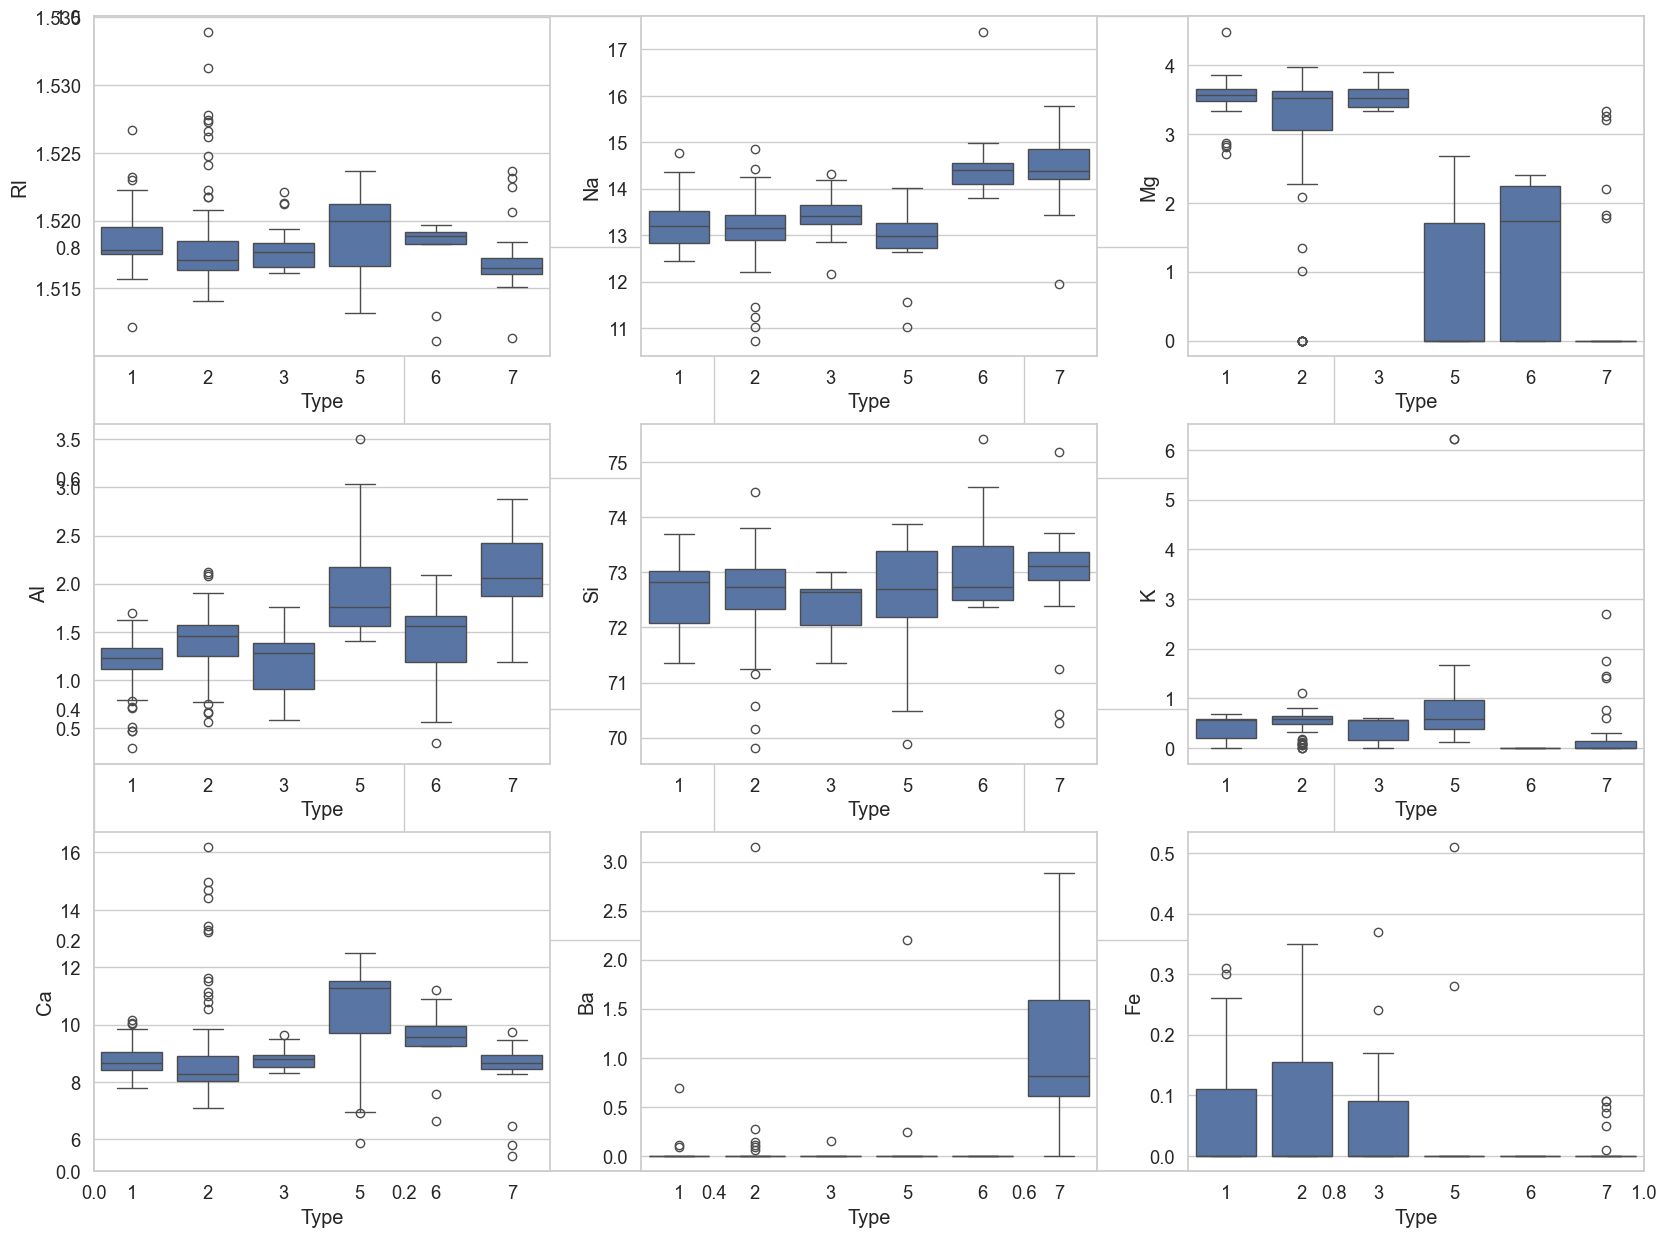

In [29]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

In [31]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

# Feature Selection using PCA

In [32]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

<Axes: >

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


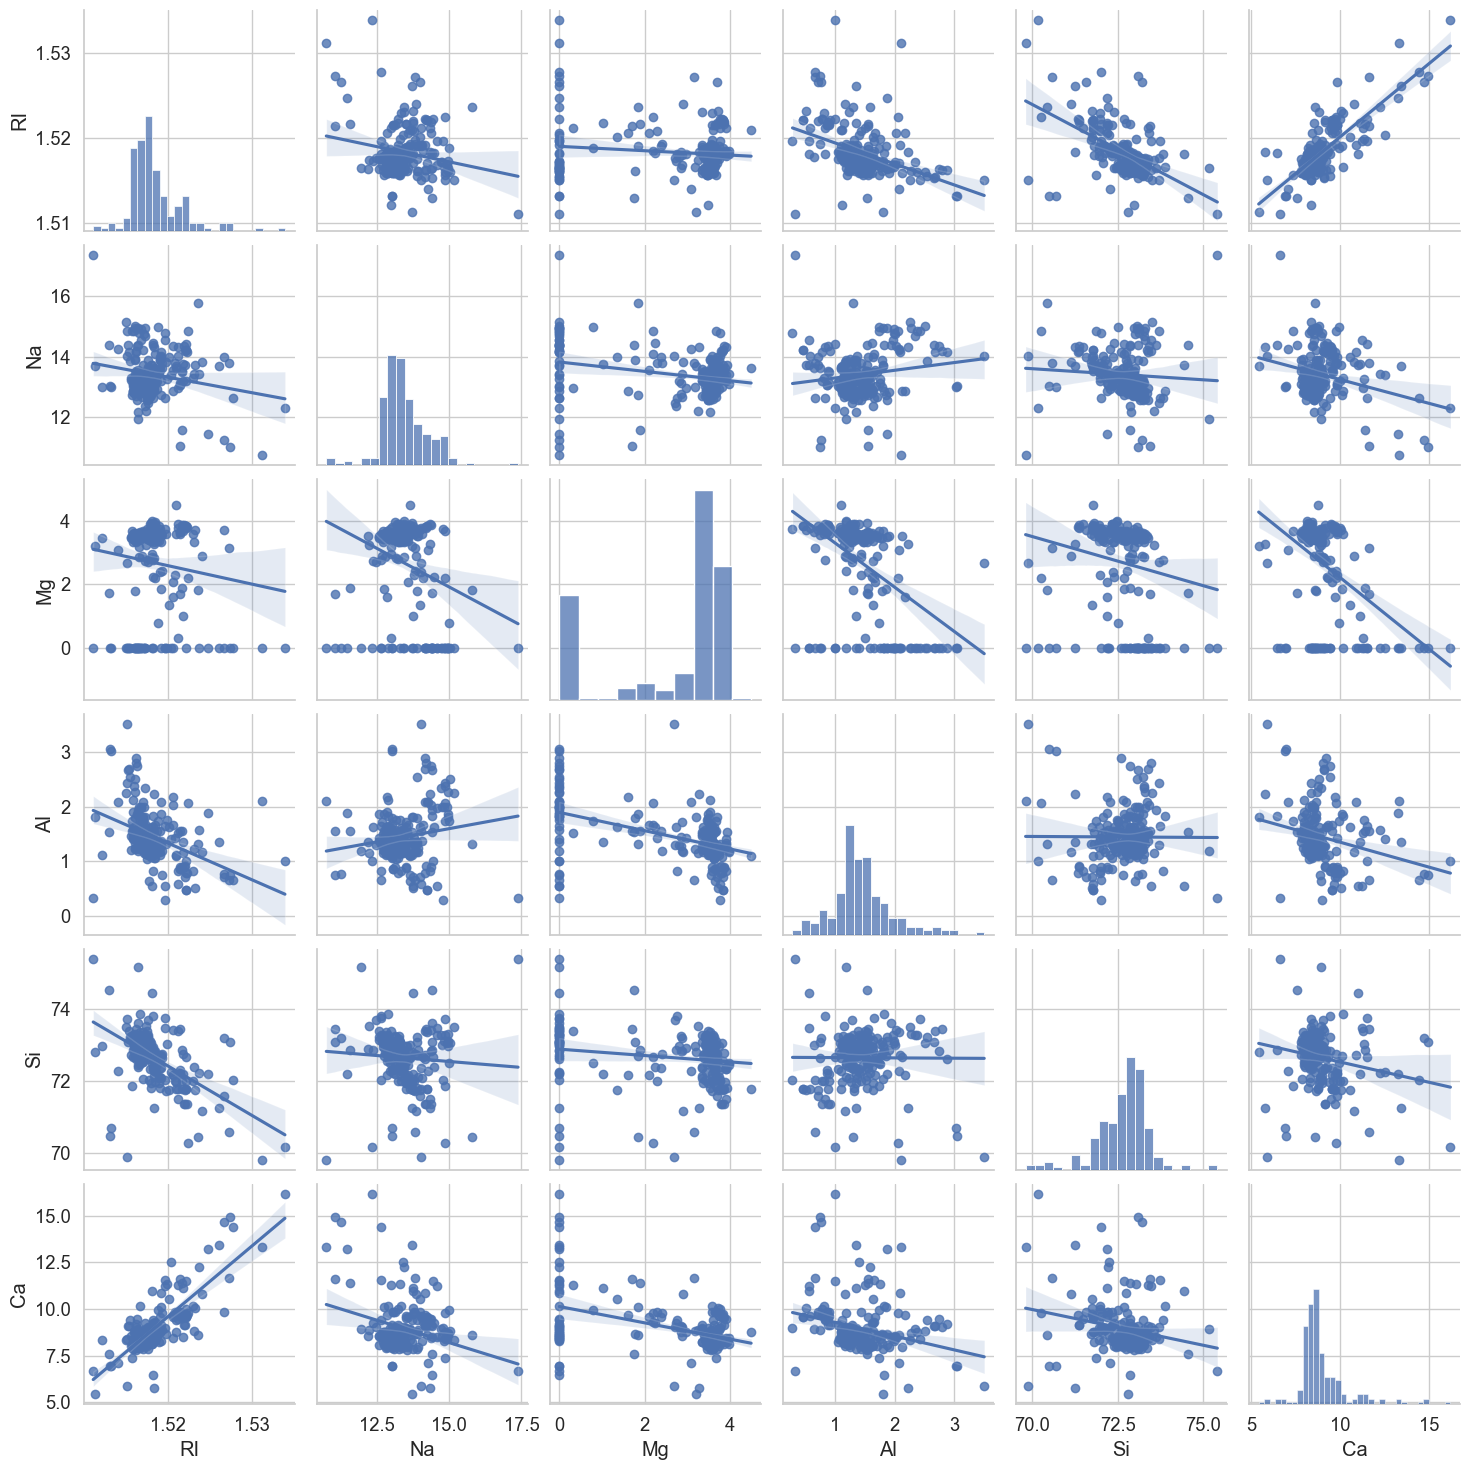

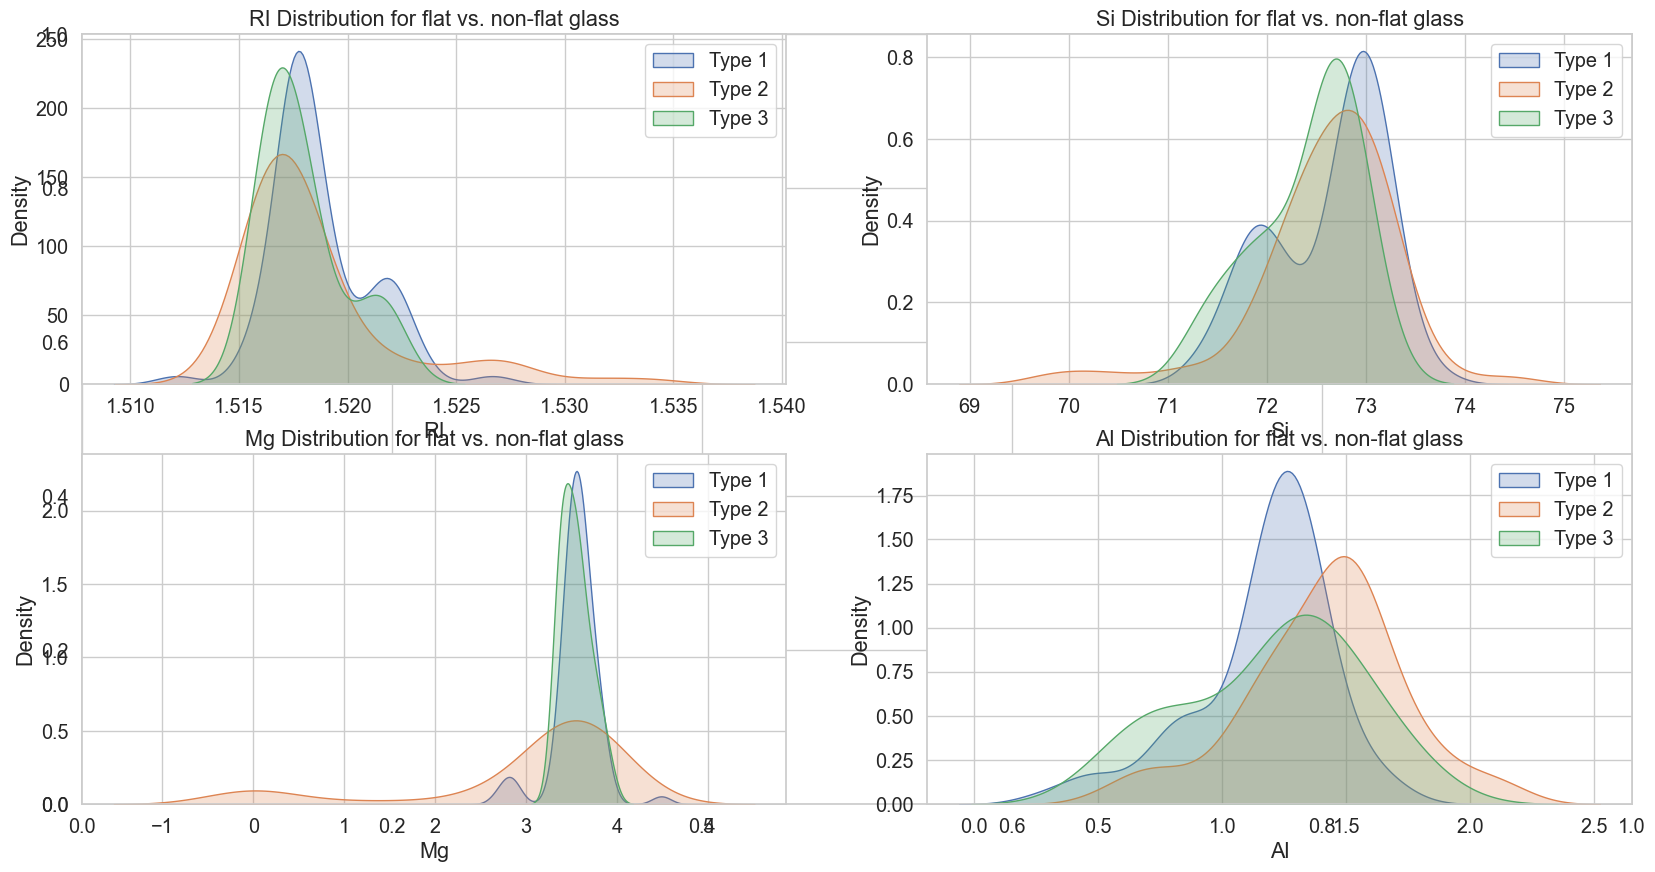

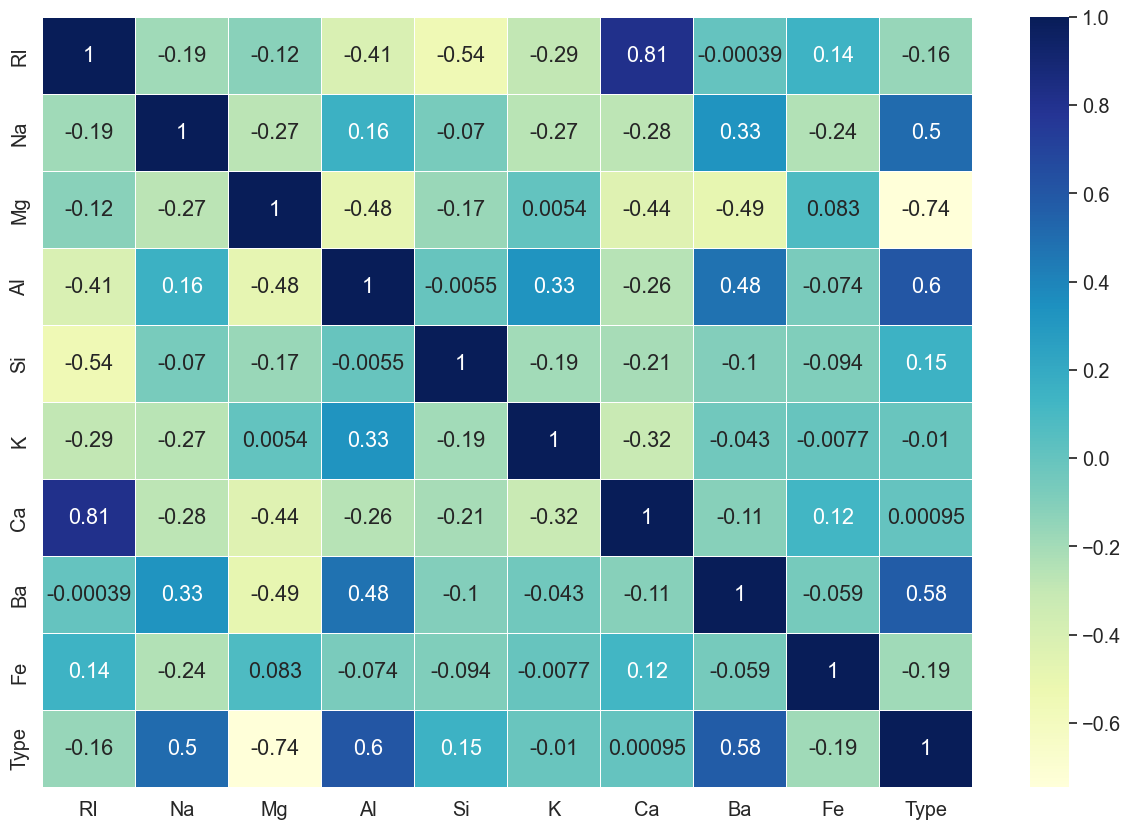

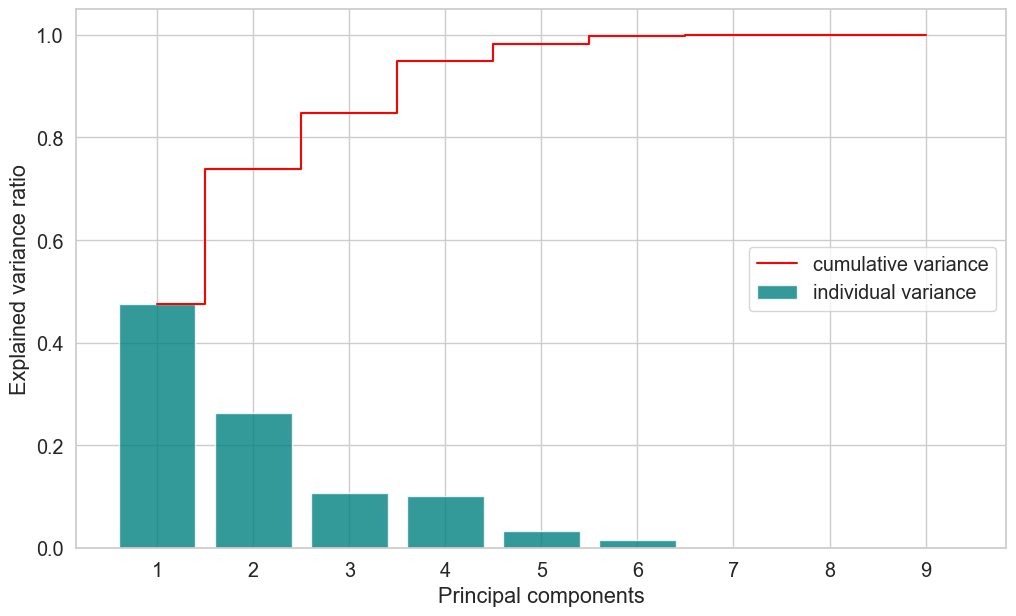

In [33]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [34]:
pca_red = PCA(n_components=9)
X_reduced = pca_red.fit_transform(X_var)

# Model Development

In [35]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_df["Type"].values

In [37]:
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
X = glass_df.drop('Type', axis=1) # All columns except 'Type'
y = glass_df['Type']

# 2. Split the data
# Assuming you want a 70/30 split and consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shape of your new variables
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (149, 9)
y_train shape: (149,)


# Testing Candidate models



In [38]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

In [39]:
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

In [40]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

In [41]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [42]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.19130998 0.05006793 0.20430786 0.14061227 0.0422486  0.12630597
 0.08107617 0.13954181 0.0245294 ]
[0.14140877 0.11868873 0.18132304 0.18736321 0.02813156 0.05634995
 0.14271313 0.12513381 0.01888779]
[0.16773881 0.06587337 0.12597375 0.16623994 0.0635112  0.03948947
 0.19137616 0.135714   0.0440833 ]


In [43]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.353846
1,Gradient Boost,0.800000
2,Decision Tree,0.661538
3,Random Forest,0.707692


In [44]:
#Hyperparameter tuning

tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
#Running final model

model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.676923076923077

# Model Performance

In [46]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(269.25, 0.5, 'predicted label')

In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.61      0.89      0.72        19
           2       0.72      0.57      0.63        23
           3       0.00      0.00      0.00         4
           5       0.80      0.67      0.73         6
           6       0.25      0.33      0.29         3
           7       0.90      0.90      0.90        10

    accuracy                           0.68        65
   macro avg       0.55      0.56      0.55        65
weighted avg       0.66      0.68      0.65        65



In [48]:
glass_df.shape

(214, 10)

In [49]:
cor=glass_df.corr()
cor.style.background_gradient(cmap='Purples')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [50]:
x=glass_df.iloc[:,0:10]
y=glass_df['Type']

In [51]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)


In [52]:
xtr


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
16,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00,1
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.0,0.28,2
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00,2
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.0,0.00,1
80,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00,2
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10,1


In [53]:
mod=RandomForestClassifier()


In [54]:
mod.fit(xtr,ytr)


RandomForestClassifier()

In [55]:
pred=mod.predict(xts)
print(pred)

[7 1 2 6 5 2 2 2 1 2 1 2 3 2 2 7 2 1 3 3 5 2 7 7 2 1 7 1 2 2 1 1 2 2 2 3 1
 3 2 7 2 6 2]


In [56]:
# Accuracy Checking.
from sklearn.metrics import accuracy_score

In [57]:
acc=accuracy_score(yts,pred)
print("Accuracy is:",acc*100)

Accuracy is: 100.0


In [58]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix

In [59]:
# Confuse Matrix
c=confusion_matrix(yts,pred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[ 9  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [60]:
#End of Assignemnt


### Bagging and Boosting

- **Bagging (Bootstrap Aggregating):**
  Bagging reduces variance by creating multiple subsets of the data (with replacement), training a model on each subset, and then aggregating their predictions. Random Forest is a classic example of Bagging.

- **Boosting:**
  Boosting reduces bias by training models sequentially, where each new model focuses on correcting the mistakes of the previous ones. Examples include AdaBoost, Gradient Boosting, and XGBoost.

**Key Difference:**  
Bagging trains models independently in parallel, while Boosting trains models sequentially, giving more weight to hard-to-classify samples.



### Handling Data Imbalance

We will check the distribution of target classes. If imbalance exists, it can bias the model towards majority classes.  
Strategies include oversampling, undersampling, or using class weights. Here, we use class weights.


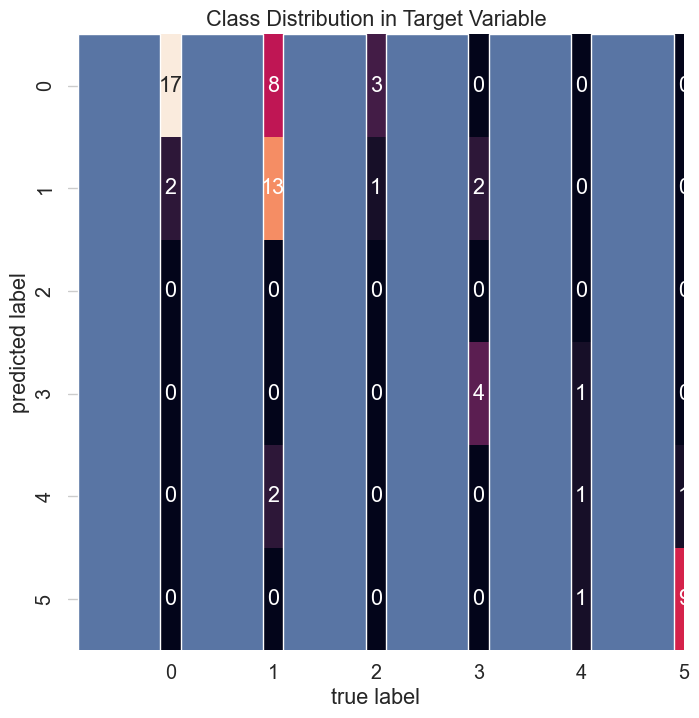

In [61]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Class Distribution in Target Variable")
plt.show()



### Feature Selection Consistency

To maintain consistency, we will use **original features** for training all models.  
This ensures fair comparison of performance across models.


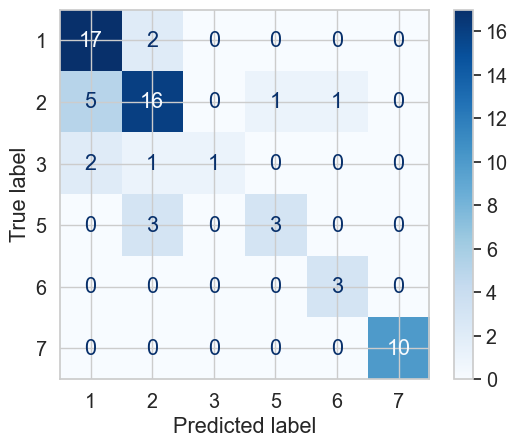

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        19
           2       0.73      0.70      0.71        23
           3       1.00      0.25      0.40         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.77        65
   macro avg       0.82      0.72      0.73        65
weighted avg       0.78      0.77      0.76        65



In [62]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

y_pred_balanced = rf_balanced.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_balanced.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_balanced))


# Implement the Bagging Classifier

--- Bagging Classifier Performance ---


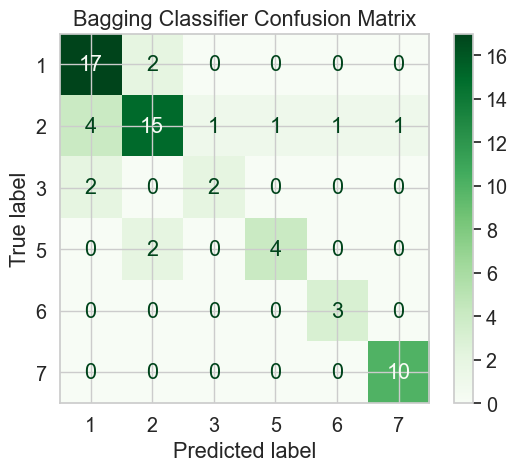


Classification Report:

              precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.79      0.65      0.71        23
           3       0.67      0.50      0.57         4
           5       0.80      0.67      0.73         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.78        65
   macro avg       0.78      0.79      0.77        65
weighted avg       0.78      0.78      0.78        65



In [64]:
## Implementing the Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Ensure this import is available or run the cell where you defined it

# 1. Initialize the Bagging Classifier
# Using 'estimator' for compatibility with modern scikit-learn versions
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), # FIXED: Changed to 'estimator'
    n_estimators=100,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# 2. Train the model
bagging_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# 4. Evaluation
print("--- Bagging Classifier Performance ---")

# Confusion Matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
disp_bagging = ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=bagging_model.classes_)
disp_bagging.plot(cmap=plt.cm.Greens)
plt.title("Bagging Classifier Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bagging))

### Bagging vs Boosting

**Bagging (Bootstrap Aggregating):**  
- Builds multiple independent models on random subsets of the data and averages their predictions.  
- Reduces variance and helps prevent overfitting.  
- Example: Random Forest is a bagging method with decision trees.

**Boosting:**  
- Builds models sequentially, where each new model tries to correct errors of the previous one.  
- Reduces bias and can improve accuracy on complex datasets.  
- Example: AdaBoost, Gradient Boosting.



### Handling Class Imbalance

- When one class dominates, models tend to predict the majority class more often.  
- Strategies to handle imbalance:
  1. **Resampling:** Oversample minority or undersample majority class.  
  2. **Class weights:** Assign higher weight to minority class in the model.  
  3. **Synthetic data:** Generate synthetic samples (SMOTE).  

In Random Forest, we can set `class_weight='balanced'` to account for imbalance.
